<a href="https://colab.research.google.com/github/kesireddysiva/Data-Projects/blob/main/Virat_Kohli_IPL_Performance_Analysis_(2008_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virat Kohli IPL Performance Analysis (2007-2022)

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the ball-by-ball data
df = pd.read_csv("/content/IPL_Ball_by_Ball_2008_2022.csv")

In [ ]:
# Filter data for Virat Kohli's batting performances
df_virat = df[df['batter'] == 'V Kohli']
df_virat = df_virat.reset_index(drop=True)

## 1. Overall Career Statistics

In [ ]:
# Calculate total career runs
total_runs = df_virat.groupby('batter', as_index=False)['batsman_run'].sum()
total_runs

,batter,batsman_run
0,V Kohli,6634


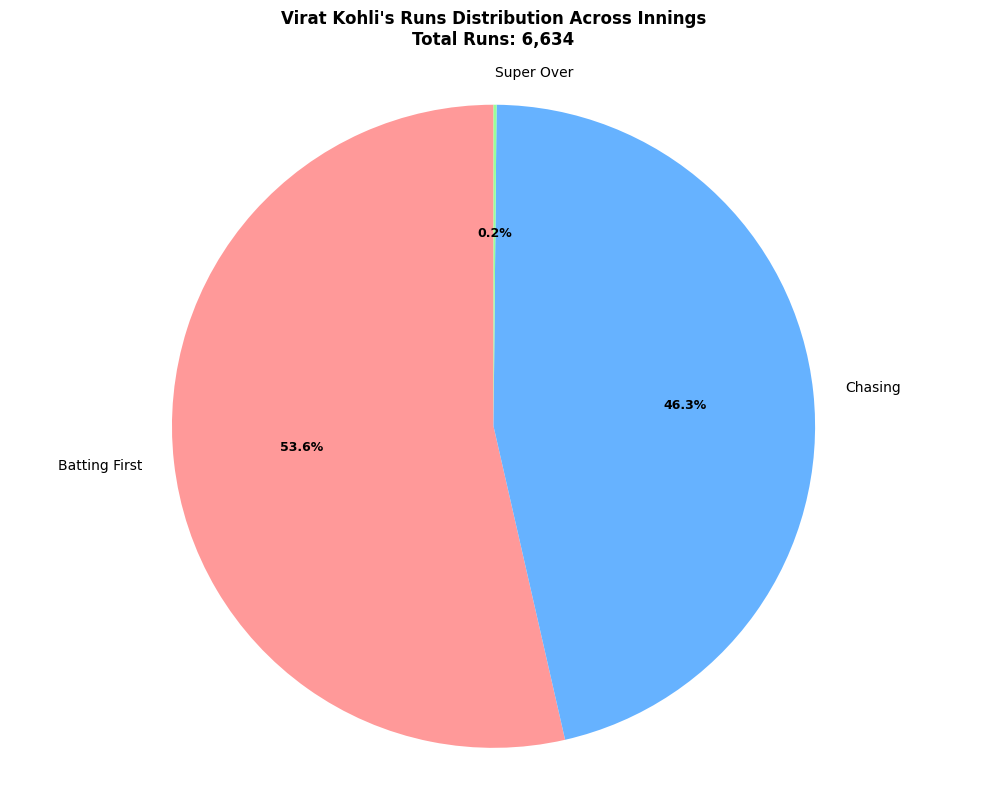

In [ ]:
# Calculate innings-wise performance
runs_innings = df_virat.groupby(['batter', 'innings'], as_index=False)['batsman_run'].sum()

# Create custom labels for the legend
innings_labels = {
    1: "Batting First",
    2: "Chasing",
    3: "Super Over",  # Innings 3/4 are for super overs,
    4: "Super Over"  # Innings 3/4 are for super overs
}

# Create the labels list
labels = [innings_labels.get(inn, f"Innings {inn}") for inn in runs_innings['innings']]

# Create pie chart with enhanced formatting
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(runs_innings['batsman_run'],
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=['#FF9999', '#66B2FF', '#99FF99'])

# Enhance the appearance of percentage labels
plt.setp(autotexts, size=9, weight="bold")
plt.setp(texts, size=10)

# Add title with total runs information
total_runs = runs_innings['batsman_run'].sum()
plt.title(f"Virat Kohli's Runs Distribution Across Innings\nTotal Runs: {total_runs:,}",
         pad=20,
         size=12,
         weight='bold')



plt.axis('equal')
plt.tight_layout()
plt.show()

## 2. Over-by-Over Analysis

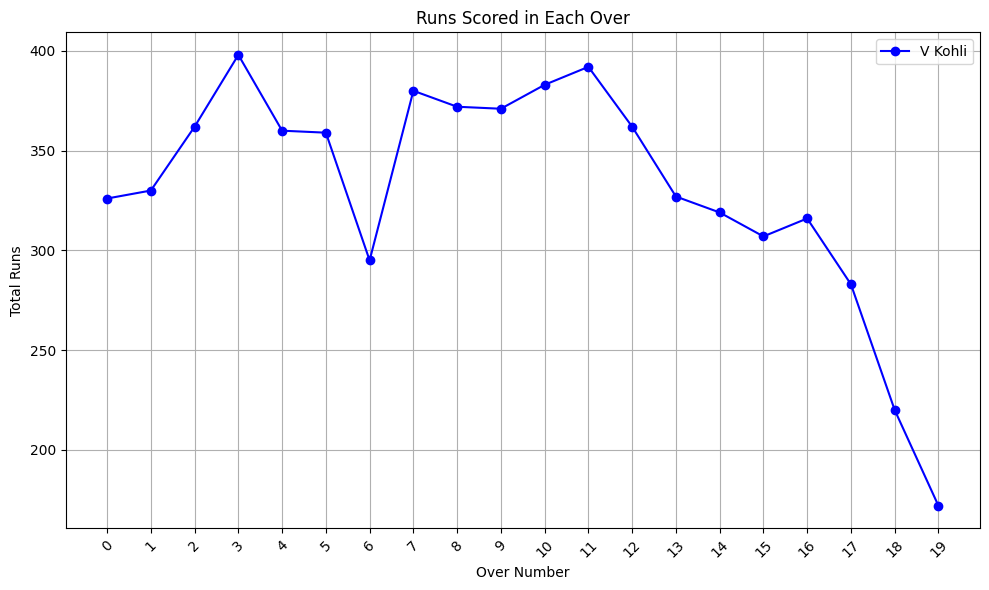

In [ ]:
# Analyze runs scored in each over
runs_by_over = df_virat.groupby(['overs', 'batter'], as_index=False)['batsman_run'].sum()

# Plot over-wise runs
plt.figure(figsize=(10, 6))
plt.plot(runs_by_over['overs'],
         runs_by_over['batsman_run'],
         marker='o',
         color='b',
         linestyle='-',
         label='V Kohli')
plt.title('Runs Scored in Each Over')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.xticks(range(int(runs_by_over['overs'].min()),
                 int(runs_by_over['overs'].max()) + 1),
           rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Dismissal Analysis

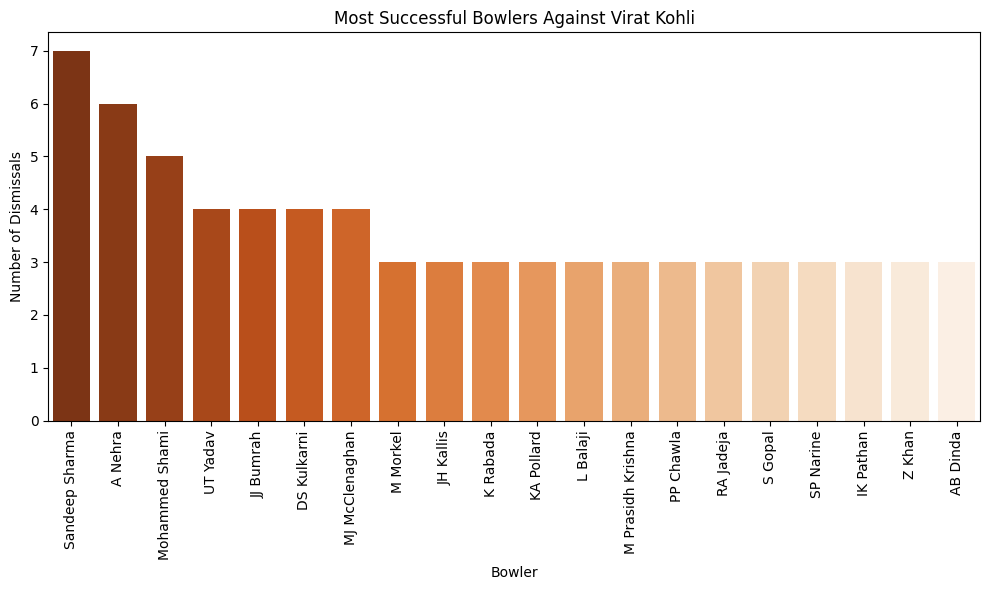

In [ ]:
# Analyze dismissals against different bowlers
dismissal_analysis = df_virat.groupby(['batter', 'bowler', 'player_out'],
                                    as_index=False)['ID'].count()
dismissal_analysis = dismissal_analysis.rename(columns={'ID': 'dismissal_count'})
top_20_dismissals = dismissal_analysis[
    dismissal_analysis['player_out'] == 'V Kohli'
].sort_values('dismissal_count', ascending=False).head(20)

# Visualize dismissal patterns
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_dismissals,
            x='bowler',
            y='dismissal_count',
            palette='Oranges_r')
plt.title('Most Successful Bowlers Against Virat Kohli')
plt.xlabel('Bowler')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Season-wise Performance

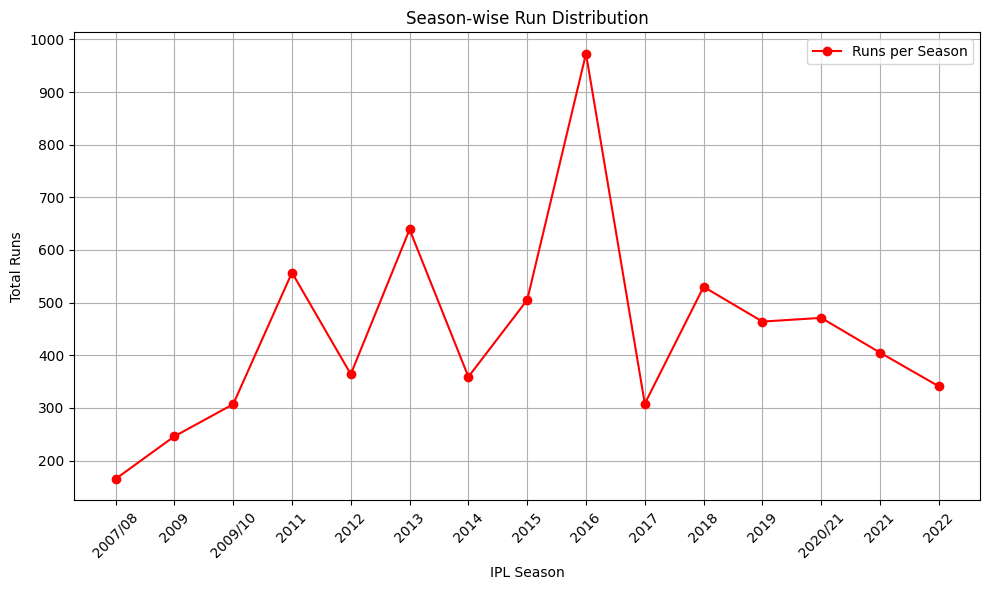

In [ ]:
# Merge with match data for season information
match_data = pd.read_csv("/content/IPL_Matches_2008_2022.csv")
df_merged = df_virat.merge(match_data[['ID', 'Season']], how='inner', on='ID')

# Calculate season-wise runs
season_runs = df_merged.groupby(['batter', 'Season'])['batsman_run'].sum().reset_index()

# Plot season-wise performance
plt.figure(figsize=(10, 6))
plt.plot(season_runs['Season'],
         season_runs['batsman_run'],
         marker='o',
         color='r',
         linestyle='-',
         label='Runs per Season')
plt.title('Season-wise Run Distribution')
plt.xlabel('IPL Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 5. Analysis of Virat Kohli's Dismissal Types

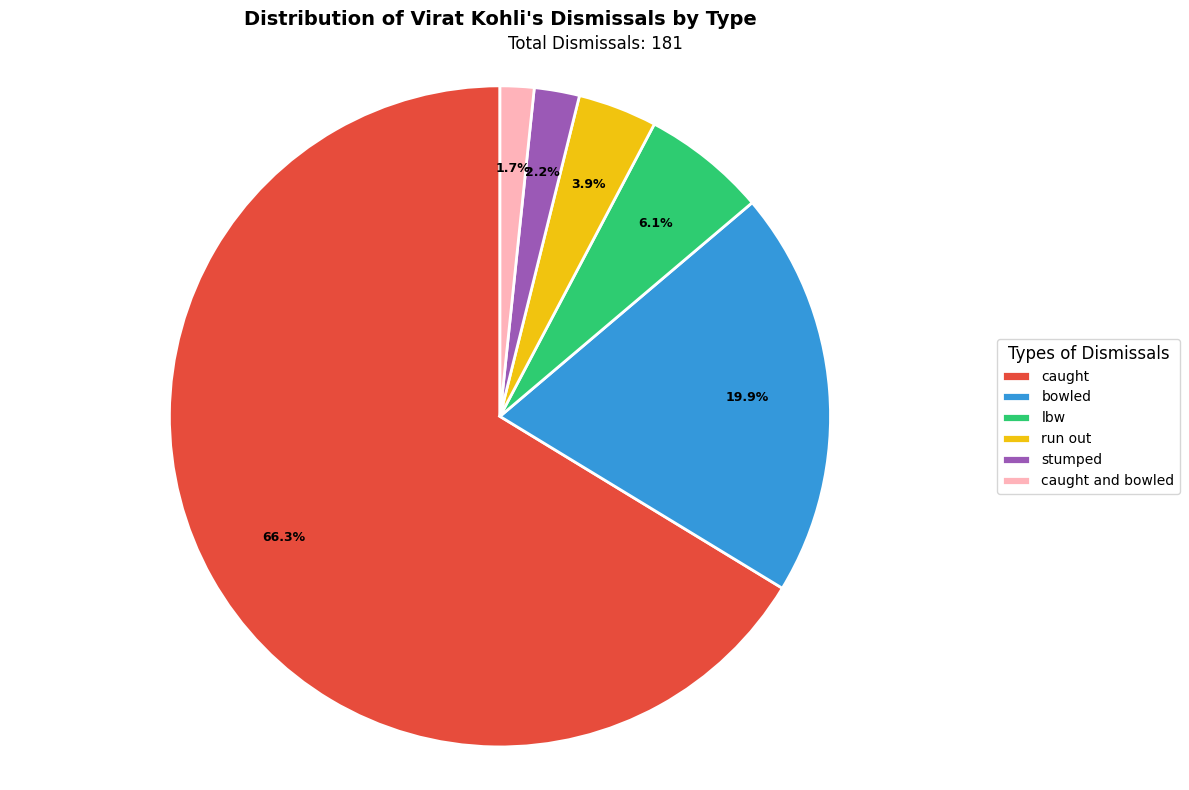


Dismissal Statistics:
--------------------
Caught: 120 times (66.3%)
Bowled: 36 times (19.9%)
Lbw: 11 times (6.1%)
Run Out: 7 times (3.9%)
Stumped: 4 times (2.2%)
Caught And Bowled: 3 times (1.7%)


In [ ]:
# Group data to get dismissal counts by type
kind_out = (df_virat.groupby(['batter', 'player_out', 'kind'], as_index=False)
            ['ID'].count()
            .rename(columns={'ID': 'count'})
            .sort_values(by='count', ascending=False)
            .reset_index()
            .drop(columns=['index']))

# Filter for Kohli's dismissals only
kind_out = kind_out[kind_out['player_out'] == 'V Kohli']

# Set up the visualization
plt.figure(figsize=(12, 8))

# Define color scheme for different dismissal types
colors = {
    'caught': '#E74C3C',    # Red
    'bowled': '#3498DB',    # Blue
    'lbw': '#2ECC71',       # Green
    'run out': '#F1C40F',   # Yellow
    'stumped': '#9B59B6',   # Purple
    'hit wicket': '#FFB3BA' # Light Pink
}

# Create pie chart
patches, texts, autotexts = plt.pie(
    kind_out['count'],
    labels=None,
    colors=list(colors.values())[:len(kind_out)],  # Match colors to number of dismissal types
    autopct='%1.1f%%',      # Show percentage with 1 decimal place
    startangle=90,          # Start from top
    pctdistance=0.75,       # Position percentage labels
    wedgeprops={
        'linewidth': 2,
        'edgecolor': 'white'
    }
)

# Customize percentage labels
plt.setp(autotexts, size=9, weight='bold')

# Add legend with dismissal types
plt.legend(
    patches,
    kind_out['kind'],
    title="Types of Dismissals",
    title_fontsize=12,
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Set title
plt.title(
    "Distribution of Virat Kohli's Dismissals by Type",
    pad=20,
    fontsize=14,
    fontweight='bold'
)

# Ensure circular pie chart
plt.axis('equal')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Add total dismissals count in the title
total_dismissals = kind_out['count'].sum()
plt.suptitle(f'Total Dismissals: {total_dismissals}', y=0.95)

# Display the plot
plt.show()

# Print detailed statistics
print("\nDismissal Statistics:")
print("--------------------")
for _, row in kind_out.iterrows():
    print(f"{row['kind'].title()}: {row['count']} times ({row['count']/total_dismissals*100:.1f}%)")

## 6. Venue Analysis

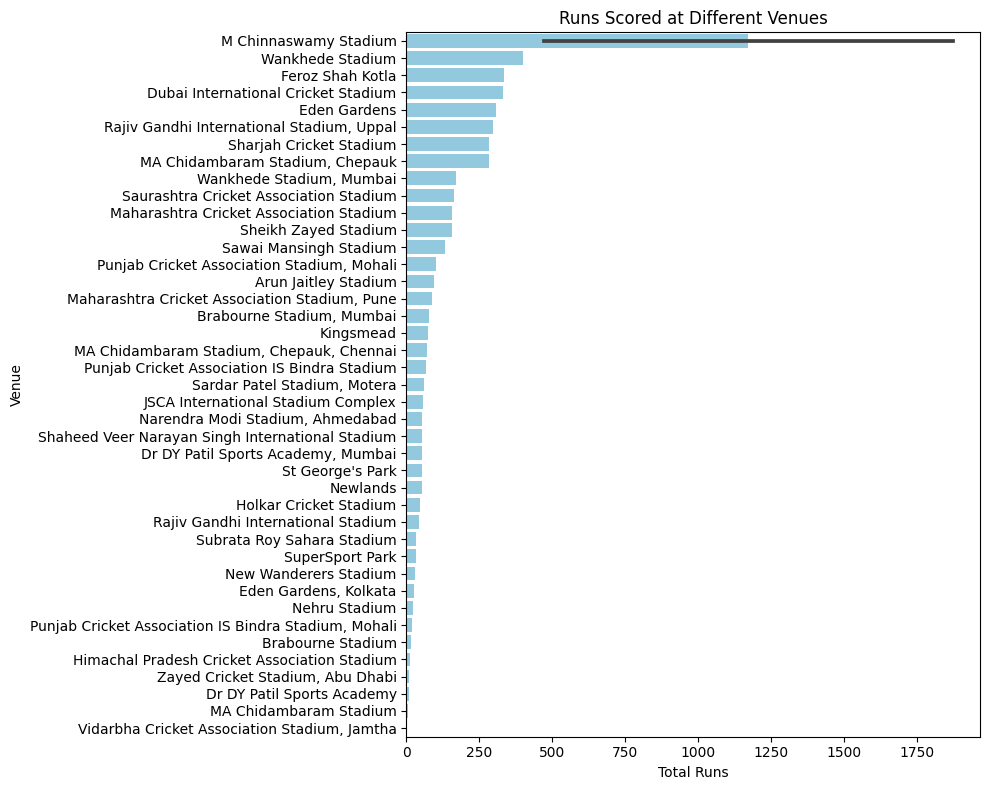

In [ ]:
# Analyze performance across venues
df_merged = df_virat.merge(match_data[['ID','Venue','MatchNumber']], how='inner', on='ID')
venue_performance = df_merged.groupby(['batter', 'Venue'],
                                    as_index=False)['batsman_run'].sum()
venue_performance = venue_performance.sort_values('batsman_run', ascending=False)

# Clean venue names
venue_performance['Venue'] = venue_performance['Venue'].str.replace('.', ' ').str.strip()

# Visualize venue-wise performance
plt.figure(figsize=(10, 8))
sns.barplot(data=venue_performance,
            y='Venue',
            x='batsman_run',
            color='skyblue')
plt.title('Runs Scored at Different Venues')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()



# 7. Impactful Knocks

In [ ]:


# Calculate contribution percentage in team totals
team_totals = df.groupby(['ID', 'BattingTeam'], as_index=False)['total_run'].sum()
rcb_totals = team_totals[team_totals['BattingTeam'] == 'Royal Challengers Bangalore']
virat_match_runs = df_virat.groupby('ID')['batsman_run'].sum().reset_index()

impact_analysis = virat_match_runs.merge(rcb_totals, on='ID')
impact_analysis['contribution_percentage'] = (
    impact_analysis['batsman_run'] / impact_analysis['total_run'] * 100
)

# Show top impactful innings
top_impacts = impact_analysis.sort_values('contribution_percentage',
                                        ascending=False).head(5)
top_impacts = top_impacts.merge(
    match_data[['ID', 'Season', 'WinningTeam']],
    how='inner',
    on='ID'
)

top_impacts

,ID,batsman_run,BattingTeam,total_run,contribution_percentage,Season,WinningTeam
0,598048,93,Royal Challengers Bangalore,162,57.407407,2013,Royal Challengers Bangalore
1,1082624,55,Royal Challengers Bangalore,96,57.291667,2017,Rising Pune Supergiant
2,980937,100,Royal Challengers Bangalore,180,55.555556,2016,Gujarat Lions
3,980969,108,Royal Challengers Bangalore,195,55.384615,2016,Royal Challengers Bangalore
4,1136574,92,Royal Challengers Bangalore,167,55.089820,2018,Mumbai Indians


## 8. Bowler Matchup Analysis

In [ ]:

# Calculate comprehensive bowling matchups
bowler_analysis = df_virat.groupby('bowler').agg({
    'batsman_run': 'sum',
    'ID': 'nunique',
    'player_out': 'count'
}).reset_index()

bowler_analysis['avg_runs_per_dismissal'] = (
    bowler_analysis['batsman_run'] / bowler_analysis['player_out']
)

# Sort for best and worst matchups
best_matchups = bowler_analysis.sort_values('batsman_run', ascending=False)
worst_matchups = bowler_analysis.sort_values('player_out', ascending=False)

best_matchups.head(10)


,bowler,batsman_run,ID,player_out,avg_runs_per_dismissal
176,R Ashwin,160,19,1,160.000000
3,A Mishra,158,13,2,79.000000
57,DJ Bravo,157,12,2,78.500000
233,UT Yadav,150,12,5,30.000000
97,JJ Bumrah,145,15,4,36.250000
185,RA Jadeja,140,17,5,28.000000
170,PP Chawla,123,14,3,41.000000
45,CH Morris,109,10,2,54.500000
67,DS Kulkarni,101,11,4,25.250000
216,SP Narine,101,13,3,33.666667


In [ ]:
worst_matchups.head(10)

,bowler,batsman_run,ID,player_out,avg_runs_per_dismissal
221,Sandeep Sharma,78,14,7,11.142857
4,A Nehra,60,10,6,10.000000
185,RA Jadeja,140,17,5,28.000000
233,UT Yadav,150,12,5,30.000000
150,Mohammed Shami,90,11,5,18.000000
247,Z Khan,64,6,4,16.000000
67,DS Kulkarni,101,11,4,25.250000
31,B Kumar,75,13,4,18.750000
83,IK Pathan,92,9,4,23.000000
140,MJ McClenaghan,39,8,4,9.750000


## 8. Phase-wise Analysis

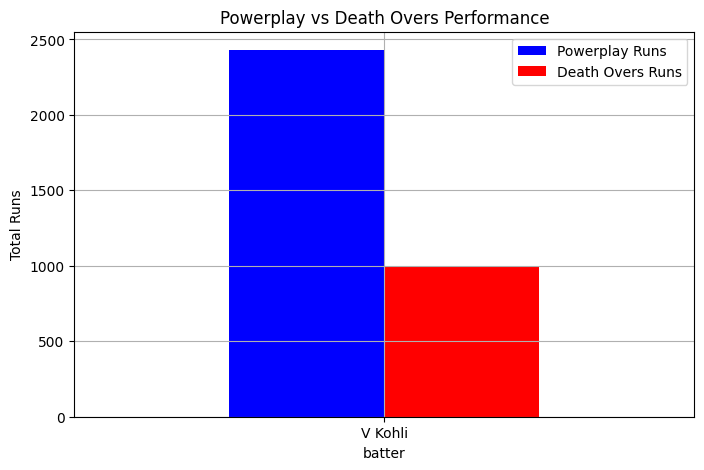

In [ ]:
# Define and analyze batting phases
powerplay_runs = df_virat[df_virat['overs'] <= 6].groupby('batter')['batsman_run'].sum()
death_runs = df_virat[df_virat['overs'] >= 16].groupby('batter')['batsman_run'].sum()

phase_comparison = pd.DataFrame({
    'Powerplay Runs': powerplay_runs,
    'Death Overs Runs': death_runs
})

# Visualize phase-wise performance
phase_comparison.plot(kind='bar',
                     figsize=(8, 5),
                     color=['blue', 'red'])
plt.title('Powerplay vs Death Overs Performance')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()